In [32]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

import seaborn as sns
sns.set(style="white", color_codes =True)
sns.set(font_scale=1.5)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics

In [33]:
df_train = pd.read_csv("train.csv")
df_train.shape

(891, 12)

In [34]:
df_train.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [35]:
df_train.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [36]:
df_train.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [37]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [38]:
df_train.shape

(891, 12)

In [39]:
df_train = df_train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [40]:
def age_approx(cols):
    Age    = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [41]:
# df_train.groupby(['Pclass']).mean()

In [42]:
df_train['Age'] = df_train[['Age', 'Pclass']].apply(age_approx, axis=1)

C:\Users\tvzbo\AppData\Local\Temp\ipykernel_9632\3625854968.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age    = cols[0]
C:\Users\tvzbo\AppData\Local\Temp\ipykernel_9632\3625854968.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


In [43]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [44]:
df_train.dropna(inplace=True)
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [45]:
df_train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [46]:
df_train_dummied = pd.get_dummies(df_train, columns=['Sex'])
df_train_dummied = pd.get_dummies(df_train_dummied, columns=['Embarked'])

In [47]:
df_train_dummied.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,0,3,35.0,0,0,8.0500,False,True,False,False,True


<Axes: >

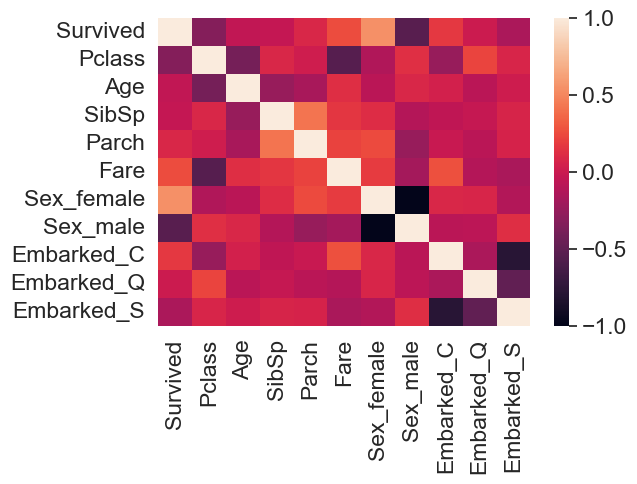

In [48]:
plt.figure(figsize=(6,4))
sns.heatmap(df_train_dummied.corr())

In [49]:
used_features =[
    "Pclass",
    "Age",
    "SibSp",
    "Parch",
    "Sex_female",
    "Sex_male",
    "Embarked_C",
    "Embarked_Q",
    "Embarked_S"
]

X = df_train_dummied[used_features].values
y = df_train_dummied['Survived']

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3,random_state=1)

In [51]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(622, 9)
(267, 9)
(622,)
(267,)


In [52]:
LogReg = LogisticRegression()

In [53]:
LogReg.fit(X_train, y_train)

c:\Users\tvzbo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
y_pred = LogReg.predict(X_test)

In [55]:
metrics.confusion_matrix(y_test, y_pred)

array([[143,  23],
       [ 22,  79]], dtype=int64)

In [56]:
metrics.accuracy_score(y_test, y_pred)

0.8314606741573034

In [57]:
len(X_test)

267

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       166
           1       0.77      0.78      0.78       101

    accuracy                           0.83       267
   macro avg       0.82      0.82      0.82       267
weighted avg       0.83      0.83      0.83       267



In [59]:
LogReg.coef_

array([[-1.04268091, -0.03969105, -0.24235854, -0.04534623,  1.20870894,
        -1.19489541,  0.35139179, -0.02296476, -0.3146135 ]])

In [60]:
LogReg.intercept_

array([3.64907516])

In [61]:
df_train_dummied[used_features].columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [62]:
LogReg.predict_proba(X_test)

array([[0.26329143, 0.73670857],
       [0.39462553, 0.60537447],
       [0.94753149, 0.05246851],
       [0.25507617, 0.74492383],
       [0.94514455, 0.05485545],
       [0.13366392, 0.86633608],
       [0.3316595 , 0.6683405 ],
       [0.52038877, 0.47961123],
       [0.78328676, 0.21671324],
       [0.40536485, 0.59463515],
       [0.74008906, 0.25991094],
       [0.21059411, 0.78940589],
       [0.74966682, 0.25033318],
       [0.14566906, 0.85433094],
       [0.8654926 , 0.1345074 ],
       [0.36773996, 0.63226004],
       [0.89363436, 0.10636564],
       [0.29521962, 0.70478038],
       [0.17427488, 0.82572512],
       [0.39910813, 0.60089187],
       [0.90538893, 0.09461107],
       [0.55407064, 0.44592936],
       [0.86473395, 0.13526605],
       [0.93863363, 0.06136637],
       [0.51571927, 0.48428073],
       [0.51335709, 0.48664291],
       [0.03864562, 0.96135438],
       [0.87004658, 0.12995342],
       [0.89875073, 0.10124927],
       [0.31990871, 0.68009129],
       [0.